## Imports

In [1]:
import cv2
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
road = cv2.imread('../DATA/road_image.jpg')
road_copy = np.copy(road)

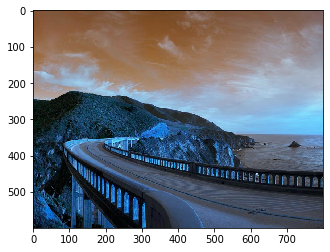

In [4]:
plt.imshow(road)

#### Create an empty space for the results to be drawn

In [5]:
road.shape

(600, 800, 3)

In [6]:
road.shape[:2]

(600, 800)

In [7]:
marker_image = np.zeros(road.shape[:2],dtype=np.int32)

In [8]:
segments = np.zeros(road.shape,dtype=np.uint8)

In [9]:
segments.shape

(600, 800, 3)

### Create colors for Markers

In [10]:
from matplotlib import cm

Returns (R,G,B,Alpha) we only need RGB values

In [11]:
cm.tab10(0)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

In [12]:
cm.tab10(1)

(1.0, 0.4980392156862745, 0.054901960784313725, 1.0)

In [13]:
np.array(cm.tab10(0))

array([0.12156863, 0.46666667, 0.70588235, 1.        ])

In [14]:
np.array(cm.tab10(0))[:3]

array([0.12156863, 0.46666667, 0.70588235])

In [15]:
np.array(cm.tab10(0))[:3]*255

array([ 31., 119., 180.])

In [16]:
x = np.array(cm.tab10(0))[:3]*255

In [17]:
x.astype(int)

array([ 31, 119, 180])

In [18]:
tuple(x.astype(int))

(31, 119, 180)

Let's make a function for all those steps

In [19]:
def create_rgb(i):
    x = np.array(cm.tab10(i))[:3]*255
    return tuple(x)

In [20]:
colors = []

In [21]:
# One color for each single digit
for i in range(10):
    colors.append(create_rgb(i))

In [22]:
colors

[(31.0, 119.0, 180.0),
 (255.0, 127.0, 14.0),
 (44.0, 160.0, 44.0),
 (214.0, 39.0, 40.0),
 (148.0, 103.0, 189.0),
 (140.0, 86.0, 75.0),
 (227.0, 119.0, 194.0),
 (127.0, 127.0, 127.0),
 (188.0, 189.0, 34.0),
 (23.0, 190.0, 207.0)]

### Setting Up Callback Function

In [23]:
colors

[(31.0, 119.0, 180.0),
 (255.0, 127.0, 14.0),
 (44.0, 160.0, 44.0),
 (214.0, 39.0, 40.0),
 (148.0, 103.0, 189.0),
 (140.0, 86.0, 75.0),
 (227.0, 119.0, 194.0),
 (127.0, 127.0, 127.0),
 (188.0, 189.0, 34.0),
 (23.0, 190.0, 207.0)]

In [24]:
# Numbers 0-9
n_markers = 10

In [25]:
# Default settings
current_marker = 1
marks_updated = False

In [26]:
def mouse_callback(event, x, y, flags, param):
    global marks_updated 

    if event == cv2.EVENT_LBUTTONDOWN:
        
        cv2.circle(marker_image, (x, y), 10, (current_marker), -1)
        
        cv2.circle(road_copy, (x, y), 10, colors[current_marker], -1)
        marks_updated = True


In [ ]:
cv2.namedWindow('Road Image')
cv2.setMouseCallback('Road Image', mouse_callback)

while True:
    
    # SHow the 2 windows
    cv2.imshow('WaterShed Segments', segments)
    cv2.imshow('Road Image', road_copy)
        
        
    # Close everything if Esc is pressed
    k = cv2.waitKey(1)

    if k == 27:
        break
        
    # Clear all colors and start over if 'c' is pressed
    elif k == ord('c'):
        road_copy = road.copy()
        marker_image = np.zeros(road.shape[0:2], dtype=np.int32)
        segments = np.zeros(road.shape,dtype=np.uint8)
        
    # If a number 0-9 is chosen change the color
    elif k > 0 and chr(k).isdigit():
        
        current_marker  = int(chr(k))
    
    # If we clicked somewhere, call the watershed algorithm on our chosen markers
    if marks_updated:
        
        marker_image_copy = marker_image.copy()
        cv2.watershed(road, marker_image_copy)
        
        segments = np.zeros(road.shape,dtype=np.uint8)
        
        for color_ind in range(n_markers):
            segments[marker_image_copy == (color_ind)] = colors[color_ind]
        
        marks_updated = False
        
cv2.destroyAllWindows()